In [2]:
%matplotlib inline
%run helper_functions.py
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
sns.set_style("whitegrid")
#pylab.rcParams['figure.figsize'] = 16, 12


# LOAD IRIS DATASET

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


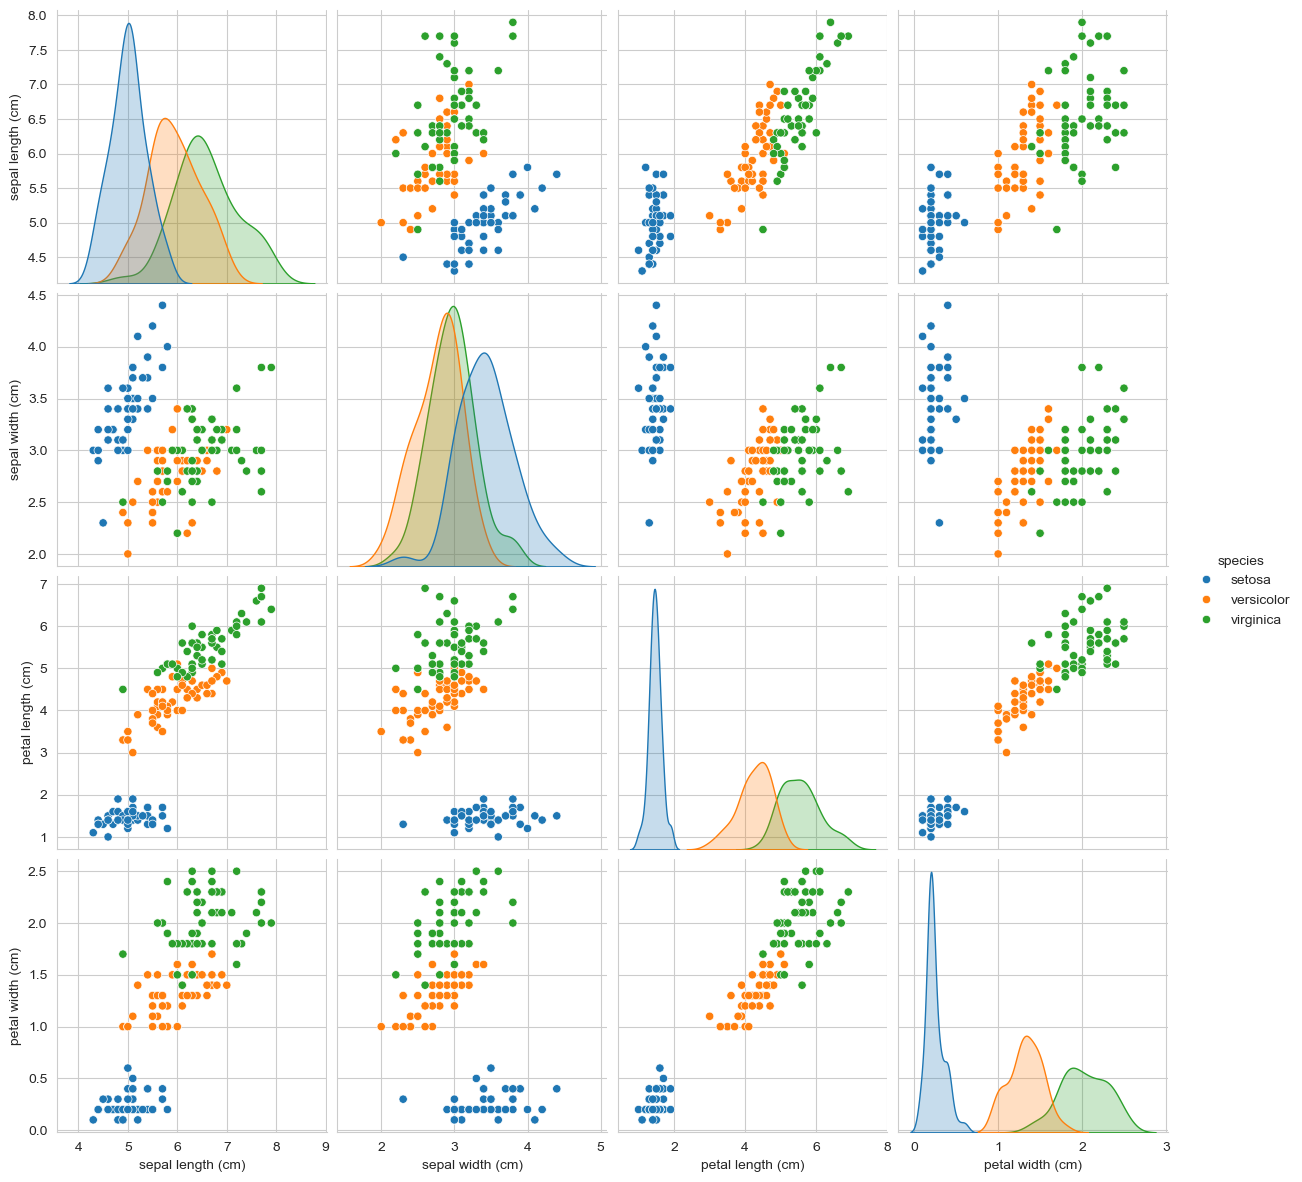

In [4]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]
sns.pairplot(iris_df, hue="species", size=3 ,diag_kind="kde")
plt.show()

In [4]:
X = iris.data
feature_names = iris.feature_names
y = iris.target
class_labels = iris.target_names

### experimenting with n_clusters

Adjusted rand score:  0.446168355648
Silhoutte score:  0.368205696538


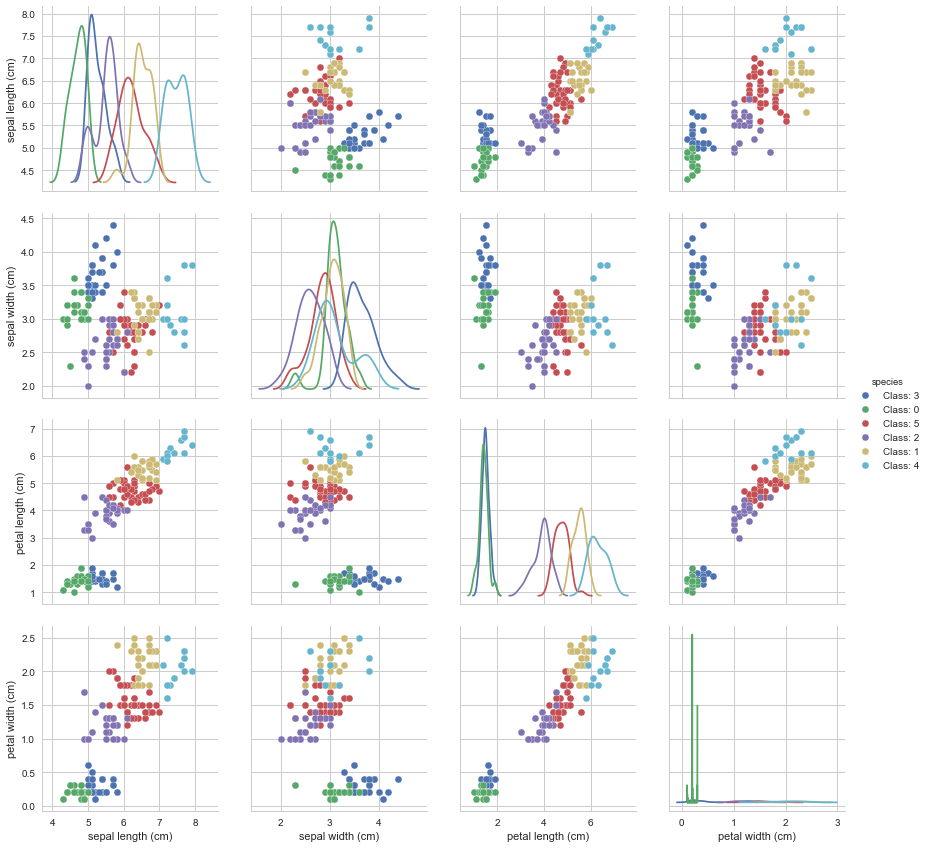

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

clustering = KMeans(n_clusters= 6).fit(X) # play with N
labels = clustering.labels_
iris_df.loc[:,'species'] = ["Class: " + str(x) for x in labels]

print ("Adjusted rand score: ", adjusted_rand_score(y, labels)  )
print ("Silhoutte score: ", silhouette_score(X, labels, metric='euclidean') )
       
sns.pairplot(iris_df, hue="species", size=3 ,diag_kind="kde")
plt.show()

# Metrics and selecting number of clusters 

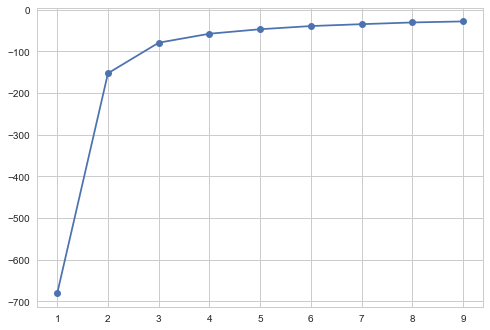

In [6]:
from sklearn.cluster import KMeans

scores = []
for k in range (1, 10):
    kmeans = KMeans(n_clusters= k).fit(X)
    score = kmeans.score(X)
    scores.append((k,score))
    
scores = np.array(scores)
plt.plot(scores[:,0], scores[:,1],  marker='o')

# Spectral clustering

Adjusted rand score:  0.443317830353
Silhoutte score:  0.351903795861


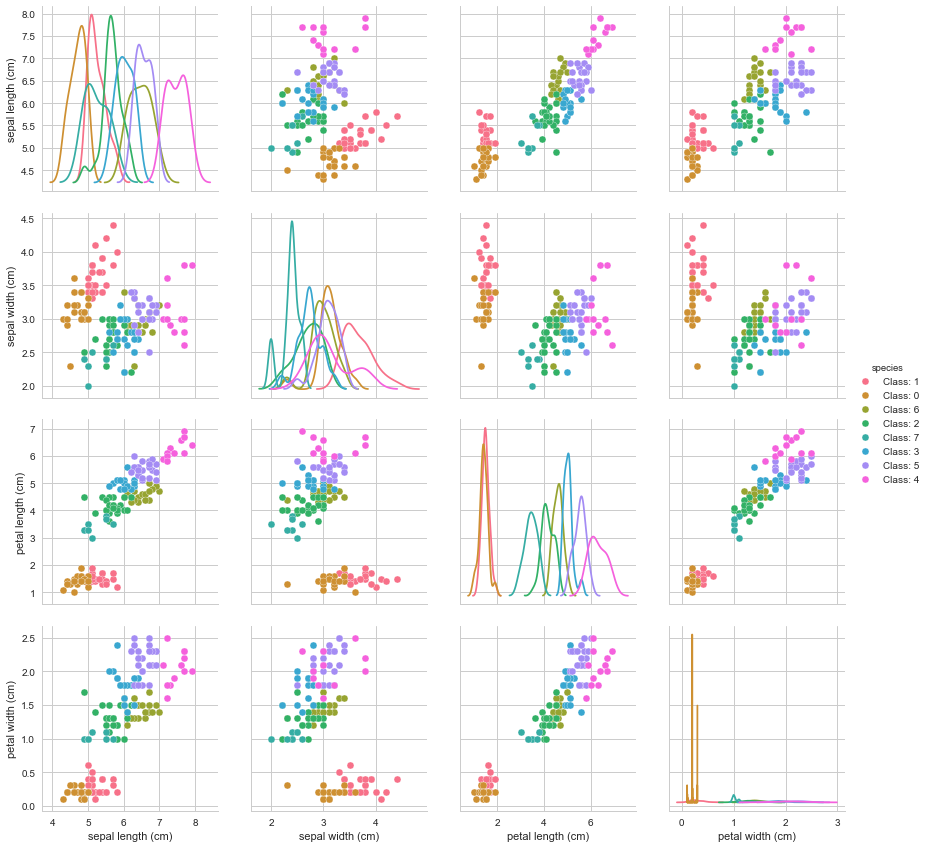

In [7]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score

clustering = SpectralClustering().fit(X)
labels = clustering.labels_
iris_df.loc[:,'species'] = ["Class: " + str(x) for x in labels]

print ("Adjusted rand score: ", adjusted_rand_score(y, labels)  )
print ("Silhoutte score: ", silhouette_score(X, labels, metric='euclidean') )
       
sns.pairplot(iris_df, hue="species", size=3 ,diag_kind="kde")
plt.show()

# DBSCAN

Adjusted rand score:  0.52061852417
Silhoutte score:  0.485842354576


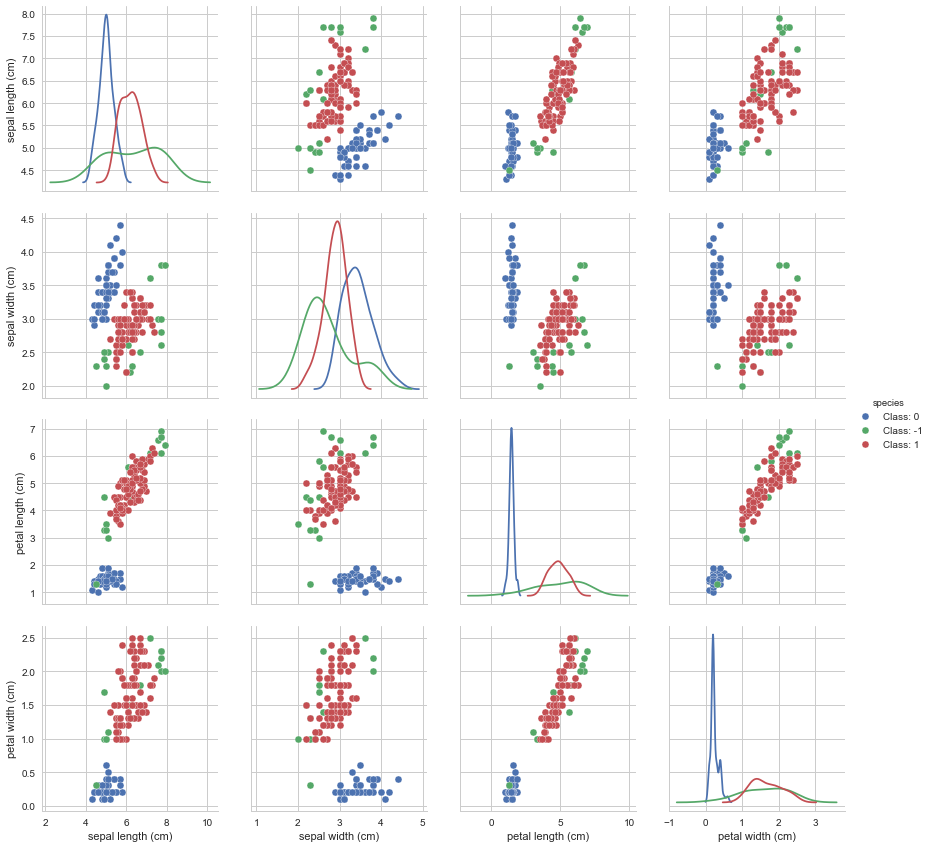

In [8]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score

clustering = DBSCAN().fit(X)
labels = clustering.labels_
iris_df.loc[:,'species'] = ["Class: " + str(x) for x in labels]

print ("Adjusted rand score: ", adjusted_rand_score(y, labels)  )
print ("Silhoutte score: ", silhouette_score(X, labels, metric='euclidean') )
       
sns.pairplot(iris_df, hue="species", size=3 ,diag_kind="kde")
plt.show()